In [1]:
#importing the required librabies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

C:\Users\ASUS_AMZAD\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#uploading the brest cancer dataset

df = pd.read_csv("C:/Users/ASUS_AMZAD/Downloads/breast-cancer.csv")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<p>There are no null values in the dataset. Hence, the data is clean and well formated.</p>

In [6]:
#printing the descriptive summary of the dataset

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h2>1.Load and prepare a dataset for binary classification.</h2>

In [7]:
#drop irrelevant column

df = df.drop(columns = ['id'])

In [8]:
#encode the target variable Malignant:(M=1) and Benign:(B=0)

encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [9]:
#vales after encoding

df['diagnosis'].unique()

array([1, 0])

In [10]:
#seprate features and target

X = df.drop(columns=['diagnosis'])
y= df['diagnosis']

In [11]:
#split the dataset into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

X_train shape: (455, 30)
y_train shape: (455,)


In [13]:
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_test shape: (114, 30)
y_test shape: (114,)


In [14]:
#standardize the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

<h2>2.Train an SVM with linear and RBF kernel.</h2>

In [15]:
#train SVM with linear kernel

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

#predict and evaluate
y_pred_linear = svm_linear.predict(X_test_scaled)

print("Linear kernel accuracy:", accuracy_score(y_test, y_pred_linear))
print("Classification report(Linear):", classification_report(y_test, y_pred_linear))

Linear kernel accuracy: 0.9736842105263158
Classification report(Linear):               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [16]:
# Train SVM (RBF kernel)

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Classification Report (RBF):\n", classification_report(y_test, y_pred_rbf))

RBF Kernel Accuracy: 0.9824561403508771
Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<h2>3.Visualize decision boundary using 2D data.</h2>

In [17]:
#Select 2 features for visualization
features = ['radius_mean', 'texture_mean']
X_2D = df[features]
y_2D = df['diagnosis']

#Train-test split
X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(
    X_2D, y_2D, test_size=0.2, random_state=42
)

#Scale features
scaler_2D = StandardScaler()
X_train_2D_scaled = scaler_2D.fit_transform(X_train_2D)
X_test_2D_scaled = scaler_2D.transform(X_test_2D)

#Train SVM (Linear and RBF)
svm_linear_2D = SVC(kernel='linear')
svm_linear_2D.fit(X_train_2D_scaled, y_train_2D)

svm_rbf_2D = SVC(kernel='rbf')
svm_rbf_2D.fit(X_train_2D_scaled, y_train_2D)


SVC()

In [18]:
# Step 5: Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['red', 'blue']
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolors='k')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.grid(True)
    plt.show()

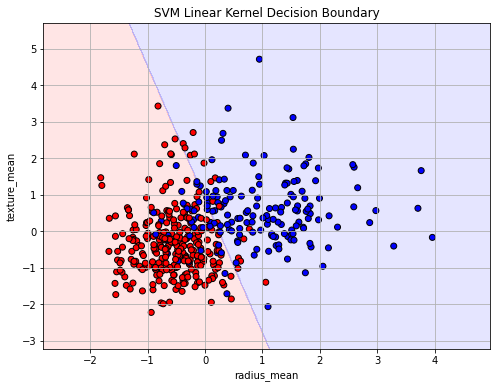

In [19]:
#Plot for linear kernel
plot_decision_boundary(svm_linear_2D, X_train_2D_scaled, y_train_2D, "SVM Linear Kernel Decision Boundary")

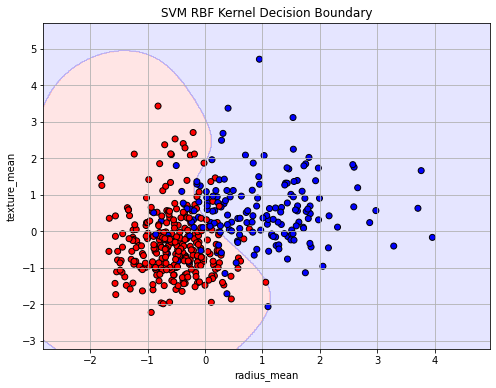

In [20]:
#plot for RBF kernel

plot_decision_boundary(svm_rbf_2D, X_train_2D_scaled, y_train_2D, "SVM RBF Kernel Decision Boundary")

<h2>4.Tune hyperparameters like C and gamma.</h2>

In [21]:
#Define paameter grid for RBF kernel

param_grid = {
    'C': [0.1, 1, 10, 100],    #regularization parameters
    'gamma': [1, 0.1, 0.01, 0.001],  #kernel coefficients
    'kernel': ['rbf']
}

In [22]:
#set up GridSearchCV

grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)

In [23]:
#fit to scaled training

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [24]:
#show best parameters and score

print("Best parameters: ", grid_search.best_params_)
print("Best cross validation accuracy", grid_search.best_score_)

Best parameters:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross validation accuracy 0.9736263736263737


In [25]:
#Evaluate best model on test data

best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(X_test_scaled, y_test)

print("Test Accuracy of best model:", test_accuracy)

Test Accuracy of best model: 0.9824561403508771


<h2>5.Use cross-validation to evaluate performance.</h2>

In [26]:
#define the model (use best parameters form the last task)

svm_cv = SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)

In [27]:
#perform 5-fold cross validation

cv_scores = cross_val_score(svm_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [28]:
# Print results

print("Cross-validation scores (accuracy):", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy:", np.std(cv_scores))

Cross-validation scores (accuracy): [0.95604396 0.96703297 0.97802198 0.96703297 0.93406593]
Mean CV Accuracy: 0.9604395604395604
Standard Deviation of CV Accuracy: 0.014906219743132445
